In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [7]:
centers = [[-5,0],[0,1.5],[5,-1]]
n_samples = 1000
random_state = 2019

In [8]:
x,y = make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)

In [9]:
print("x.shape:{}".format(x.shape))
print("y.shape:{}".format(y.shape))

x.shape:(1000, 2)
y.shape:(1000,)


In [10]:
transformation = [[0.4,0.2],[-0.4,1.2]]

In [12]:
x = np.dot(x,transformation)

training score:0.989(multinomial)
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]
training score:0.974(ovr)
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]


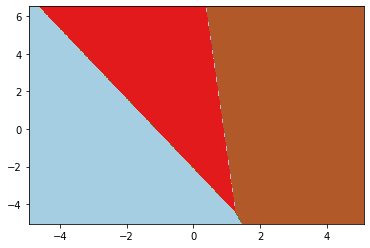

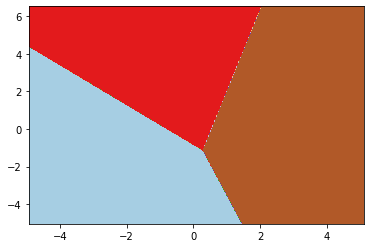

In [19]:
for multi_class in ("multinomial","ovr"):
    clf = LogisticRegression(solver="sag",max_iter=1000,
                            random_state=random_state,
                            multi_class=multi_class)
    clf.fit(x,y)
    score = clf.score(x,y)
    print("training score:%0.3f(%s)"%(score,multi_class))
    
    h = 0.02
    x_min,x_max = x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
    
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
    
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx,yy,z,cmap=plt.cm.Paired)
    print(z)